In [94]:
from ucimlrepo import fetch_ucirepo


In [95]:
# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# variable information
print(secondary_mushroom.variables)

                    name     role         type demographic description units  \
0                  class   Target  Categorical        None        None  None   
1           cap-diameter  Feature   Continuous        None        None  None   
2              cap-shape  Feature  Categorical        None        None  None   
3            cap-surface  Feature  Categorical        None        None  None   
4              cap-color  Feature  Categorical        None        None  None   
5   does-bruise-or-bleed  Feature  Categorical        None        None  None   
6        gill-attachment  Feature  Categorical        None        None  None   
7           gill-spacing  Feature  Categorical        None        None  None   
8             gill-color  Feature  Categorical        None        None  None   
9            stem-height  Feature   Continuous        None        None  None   
10            stem-width  Feature   Continuous        None        None  None   
11             stem-root  Feature  Categ

# Exploratory Data Analysis

In [96]:
X


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [97]:
secondary_mushroom.data.features.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [98]:
X=X.drop(['ring-type','gill-attachment','cap-surface','gill-spacing','stem-root','stem-surface','veil-type','veil-color','spore-print-color'],axis=1)

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-color             61069 non-null  object 
 3   does-bruise-or-bleed  61069 non-null  object 
 4   gill-color            61069 non-null  object 
 5   stem-height           61069 non-null  float64
 6   stem-width            61069 non-null  float64
 7   stem-color            61069 non-null  object 
 8   has-ring              61069 non-null  object 
 9   habitat               61069 non-null  object 
 10  season                61069 non-null  object 
dtypes: float64(3), object(8)
memory usage: 5.1+ MB


In [100]:
X.drop_duplicates(inplace=True)

In [101]:
X, y = X.align(y, join="inner", axis=0)

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
cols = [col for col in X.columns if X[col].dtype == 'object']
n=len(cols)
n

8

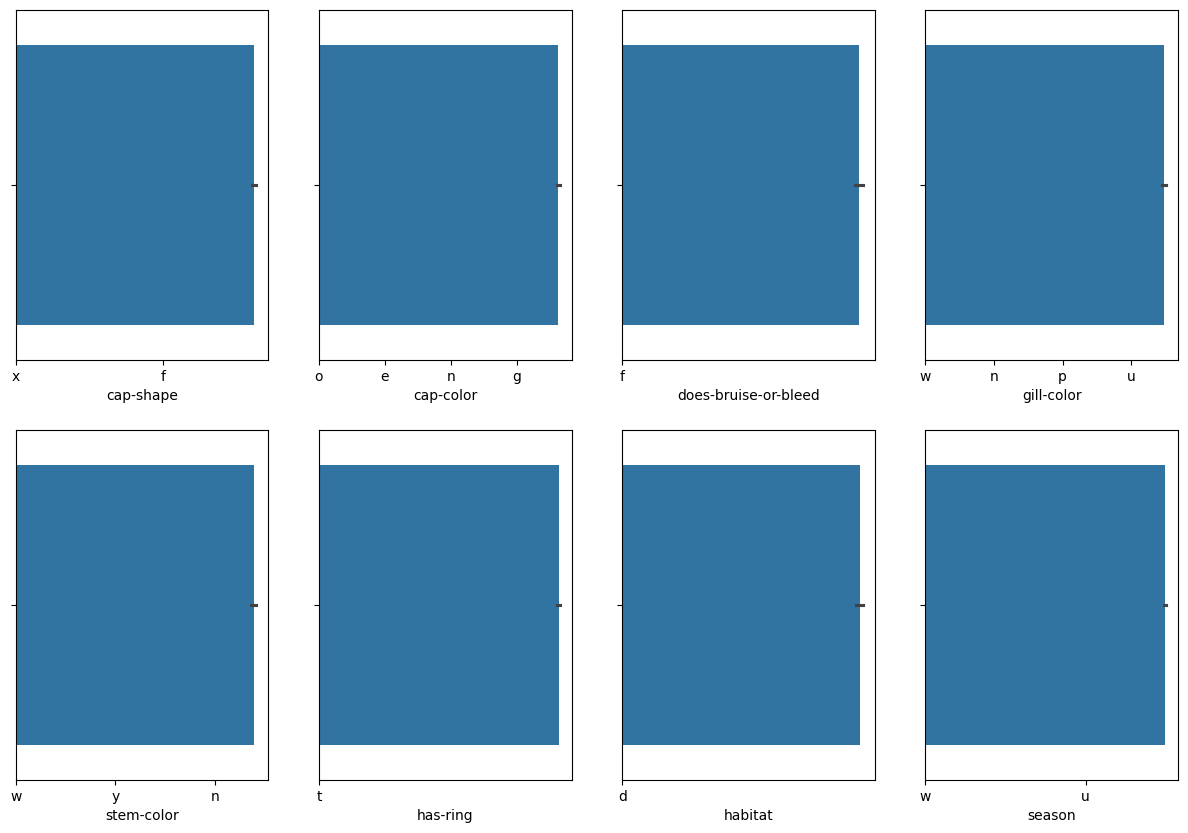

In [104]:
plt.figure(figsize=(15,10))
for i, col in enumerate(cols,1):
    plt.subplot(2, (n+1)//2, i)
    sns.barplot(x=X[col])
   
    

In [105]:
cols_num=[col for col in X.columns if X[col].dtype == 'float64']
n=len(cols_num)
# X[cols_num].shape
cols_num

['cap-diameter', 'stem-height', 'stem-width']

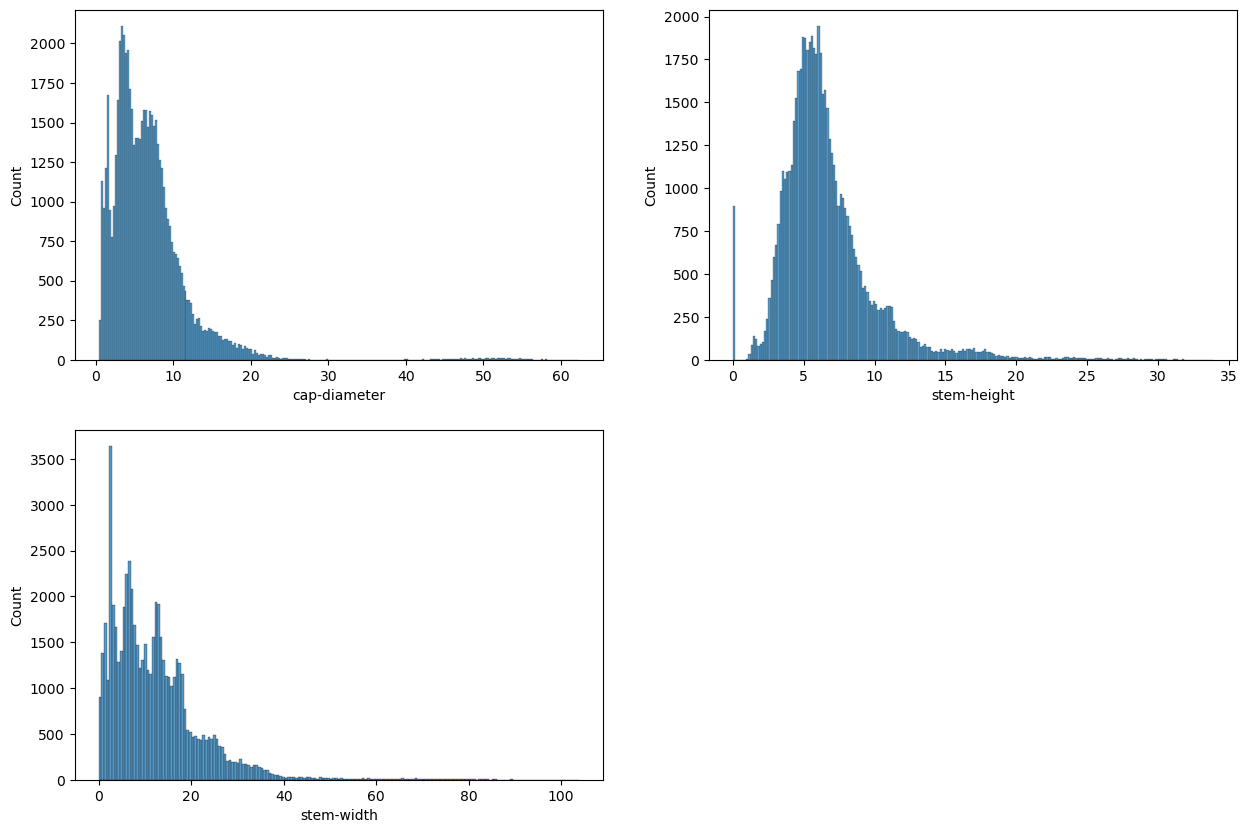

In [106]:
plt.figure(figsize=(15,10))
for i, col in enumerate(cols_num,1):
    plt.subplot(2, (n+1)//2, i)
    sns.histplot(x=X[col])

### categorical data correlation with terget

In [107]:
from scipy.stats import chi2_contingency

In [108]:
y_target = y.squeeze() 
for col in cols:
    table = pd.crosstab(X[col], y_target)
    chi2, p, dof, ex = chi2_contingency(table)
    print(f"{col}: p-value={p:.2f}")

cap-shape: p-value=0.00
cap-color: p-value=0.00
does-bruise-or-bleed: p-value=0.00
gill-color: p-value=0.00
stem-color: p-value=0.00
has-ring: p-value=0.00
habitat: p-value=0.00
season: p-value=0.00


all are related to target.

### numerical data correlation with the target

In [109]:
from sklearn.feature_selection import f_classif

In [122]:
for col in cols_num:
    _,P=f_classif(X[[col]],y_target)
    print(f"{col}: p={p:.4e}")
   


cap-diameter: p=1.6517e-187
stem-height: p=1.6517e-187
stem-width: p=1.6517e-187


In [111]:
#check class balance
print(y[y=='p'].value_counts())
print(y[y=='e'].value_counts())

class
p        33722
Name: count, dtype: int64
class
e        27181
Name: count, dtype: int64


terget is balanced

#  Data Cleaning & Preprocessing

In [112]:
print((X == "?").sum())

cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64


### encoding

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
label_encoder = LabelEncoder()
for col in cols:
    X[col]=label_encoder.fit_transform(X[col])


### scaling

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()
for col in cols_num:
    X[col]=scaler.fit_transform(X[[col]])

### data split

In [117]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)